In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [35]:
img = cv2.imread('italy2018.jpg')

In [8]:
img[0]



array([[38, 43, 11],
       [37, 42, 10],
       [36, 41,  9],
       ...,
       [24, 37, 15],
       [22, 36, 12],
       [23, 36, 12]], dtype=uint8)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

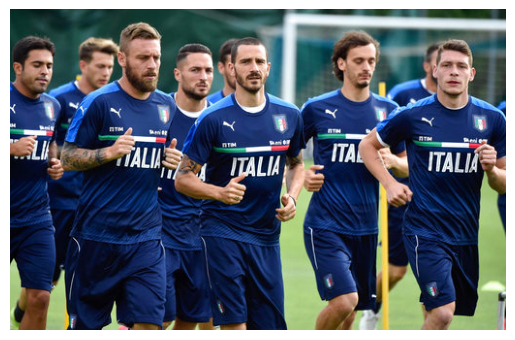

In [41]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
b,r,g = cv2.split(img)

In [43]:
img2 = cv2.merge((b,g,r))

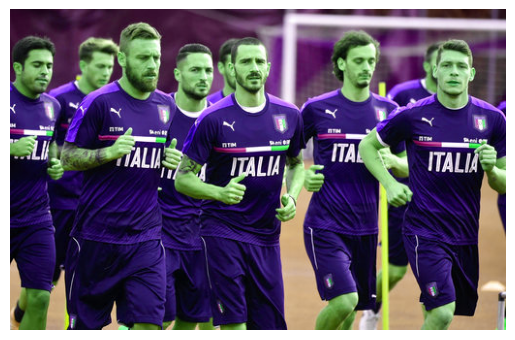

In [46]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
cv2.imwrite('italy2018altered.png', img2)

True

In [49]:
img2 = cv2.imread('soccer.jpg')

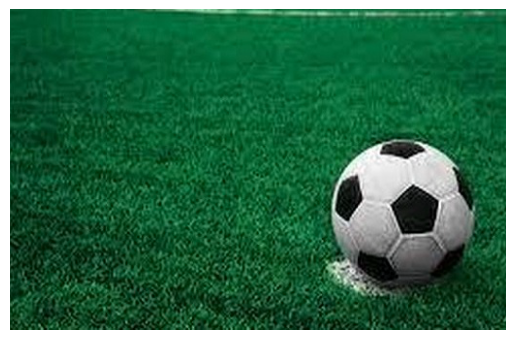

In [50]:
plt.axis('off')
plt.imshow(img2)
plt.show()

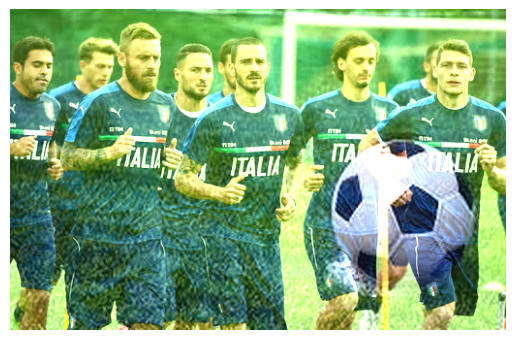

In [51]:
img3 = cv2.add(img,img2)
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

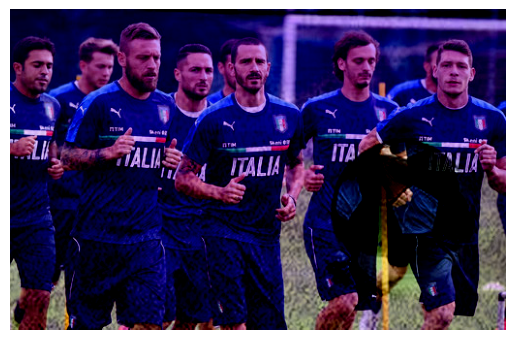

In [52]:
img3 = cv2.subtract(img, img2)
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

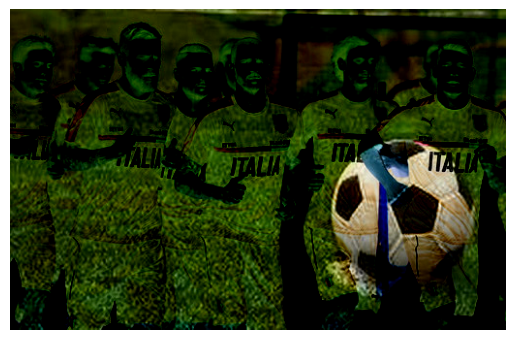

In [53]:
img3 = cv2.subtract(img2, img)
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()


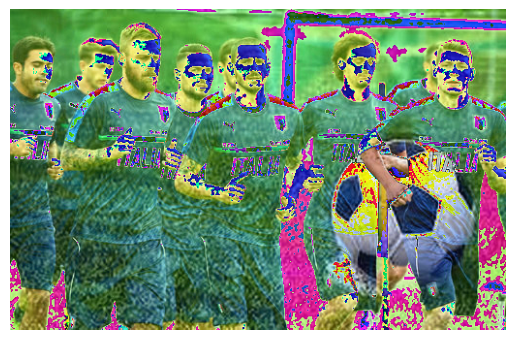

In [54]:
img3 = img + img2
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

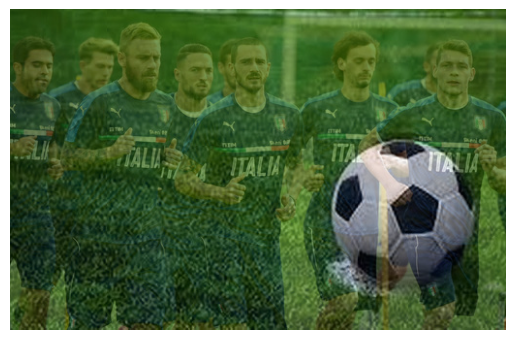

In [55]:
img3 = cv2.addWeighted(img, 0.3, img2, 0.7, 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()


# Edge Detection and Image Gradient Analysis

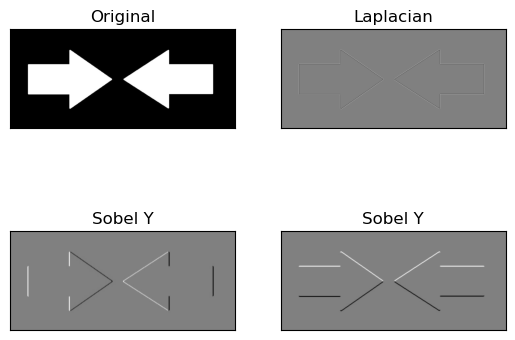

In [23]:
from matplotlib import pyplot as plt

img = cv2.imread('blackandwhite.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


In [24]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)


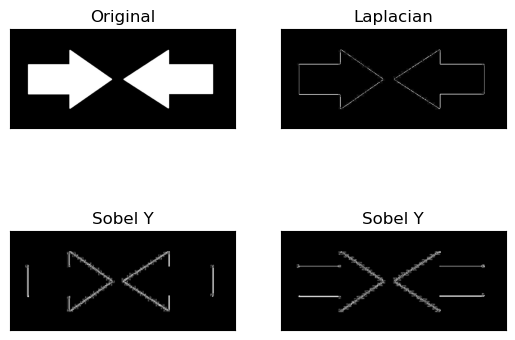

In [25]:
laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


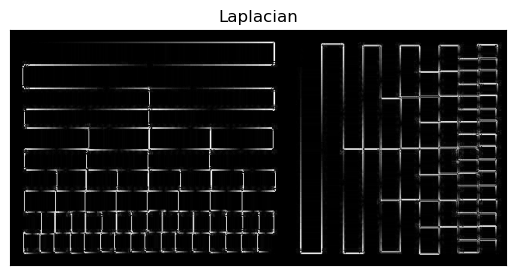

In [26]:
from matplotlib import pyplot as plt
img = cv2.imread('gradients.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()


# A Deep Learning Example: The Face Detection

In [56]:
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

In [57]:
image = cv2.imread('italy2018.jpg')
(h, w) = image.shape[:2]


In [58]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [59]:
confidence_threshold = 0.5

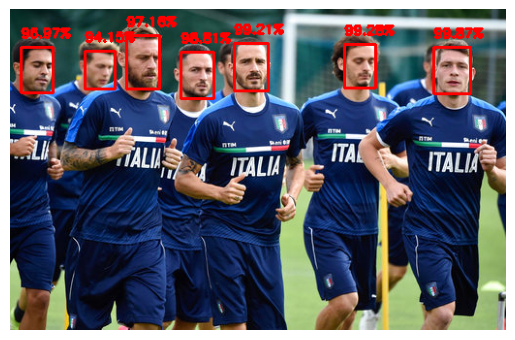

In [60]:
net.setInput(blob)
detections = net.forward()
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > confidence_threshold:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()